Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your collaborators below:

In [1]:
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-info">**Hint**: Much of the material covered in this problem is introduced in the AIMA3/AIMA2 Chapter 13 reading. If you are having trouble with the questions here, that might be a good place to look.</div>

---
## Introduction

Suppose you pull a coin from your pocket and want to know whether it is fair or biased. Let $\theta$ denote the probability that the coin produces heads (`H`) each time you flip it, and assume that successive flips are independent.  You have two hypotheses: 
 - $h_0$: the coin is fair, with $\theta = 0.5$
 - $h_1$: the coin is biased, with $\theta = 0.95$.
 
_A priori_, you think your coin is more likely to be fair, although you know that a biased coin is still a distinct possibility. To reflect this intuition, you choose priors $P(h_0) = 0.6$ and $P(h_1) = 0.4$.

Recall from class that you can use Bayes' rule to calculate the probability of a particular hypothesis being true given some data. Bayes' rule states that

  \begin{equation}
    P(h|d)=\frac{P(d|h)P(h)}{\sum_{h'}P(d|h')P(h')}
  \end{equation}
  
where the term $P(h|d)$ is the *posterior* probability of a particular hypothesis $h$ being true given some data $d$. $P(d|h)$ is the *likelihood* of seeing the data $d$ if the hypothesis $h$ was true. $P(h)$ is the *prior* probability of $h$ being true which measures the strength of your belief in $h$ _before_ your observed the data $d$.

For more background on probability and Bayes rule, see Chapter 13 of the course's texbook 'Artificial Intelligence: A modern approach' and especially Section 5 of Chapter 13.

---
## Part A (3 points)

<div class="alert alert-success">Imagine you flip your coin once and it comes up heads. Let $d$ denote this data (i.e., the outcome of the coin flip). What is the probability of your data under $h_0$ and $h_1$ (i.e., what is $P(d|h_0)$ and $P(d|h_1)$)? To begin, complete the function template `likelihood` to compute the likelihood of the data under a particular hypothesis about $\theta$.</div>

<div class="alert alert-warning">**Hint**: If you're stuck, look into Bernoulli random variables.</div>

In [3]:
def likelihood(data, theta):
    """
    Returns the likelihood of obtaining a particular sequence of flips using a 
    coin of bias theta.
    
    Your solution can be done in one line of code, including the return
    statement.
    
    Parameters
    ----------
    data : a list of shape (n,)
        A binary sequence of coin flips. Heads are 1's and Tails are 0's. 
        
    theta : float
        A value between 0 and 1 representing the hypothesized coin's bias. 
        The probability that a coin produces Heads each time it is flipped.
        
    Returns
    -------
    likelihood : float
        The probability of getting the observed sequence using the hypothesized 
        coin.
    """
    # YOUR CODE HERE
    lst = []
    for d in data:
        if d == 0:
            lst.append(1 - theta)
        if d == 1:
            lst.append(theta)
    return np.prod(lst)

In [4]:
# add your own test cases here!


In [5]:
"""Check likelihood computes the correct values"""
from nose.tools import assert_equal
# create fake data and hypotheses
val = np.array([[0], [1, 1, 0], [0, 1, 1], [0, 0]])
hyp = np.array([0.5, 0.0, 1.0, 0.75])

# correct answers
ans = np.array([[0.5, 1.0, 0.0, 0.25], 
                [0.125, 0.0, 0.0, 0.140625], 
                [0.125, 0.0, 0.0, 0.140625], 
                [0.25, 1.0, 0.0, 0.0625]])

for idi, i in enumerate(val):
    for idj, j in enumerate(hyp):
        assert_equal(ans[idi, idj], likelihood(i,j), "Incorrect likelihood computed on a test case")

print("Success!")

Success!


<div class="alert alert-success">Now, use your completed `likelihood` function to implement Bayes' rule to compute the posterior probabilities for a collection of hypotheses and their priors.</div>

In [6]:
def posteriors(data, thetas, priors):
    """
    Computes the posterior probabilities of a collection of hypotheses 
    given their prior probabilities and some data.
    
    Your solution can be done in two lines of code, including the
    return statement.
    
    Parameters
    ----------
    data : a list of shape (n,)
        A binary sequence of the observed heads (represented as 1's) and 
        tails (represented as 0's) generated by flipping a coin n times.
        
    thetas : numpy array of shape (m,)
        An array of values between 0 and 1 representing the hypothesized 
        probability that a coin produces Heads each time it is flipped.
        
    priors : numpy array of shape (m,)
        An array of values between 0 and 1 representing the probabilities
        that the corresponding hypothesis in theta is true BEFORE 
        observing the data.

    Returns
    -------
    posteriors : numpy array of shape (m,)
        An array of values between 0 and 1 representing the probabilities
        of the items in thetas given their prior probabilities and the 
        observed data.
    """
    # YOUR CODE HERE
    denom = []
    n = 0
    for p in priors:
        denom.append(likelihood(data, thetas[n]) * p)
        n = n+1
    denom_sum = np.sum(denom)
    return [(d / denom_sum) for d in denom]

In [7]:
# add your own test cases here!


Now we are ready to find out how strongly we should belief that the coin is fair after we have seen it come up heads once.

So let's use the `posteriors` function on the values of $\theta$ and priors defined above (i.e., $\theta=0.5$ for $h_0$, $\theta=0.95$ for $h_1$, $P(h_0)=0.6$, and $P(h_1)=0.4$). As a sanity check, let's verify that the posterior distribution over the hypothesis space sums to 1:

In [8]:
data = np.ones(1)
thetas = np.array([0.5, 0.95])
priors = np.array([0.6, 0.4])
print("Posteriors: " + str(posteriors(data, thetas, priors)))
print("Total sum:  " + str(np.sum(posteriors(data, thetas, priors))))

Posteriors: [0.44117647058823534, 0.55882352941176472]
Total sum:  1.0


Interesting! So after observing the coin come up heads once we should think that it is slightly less likely to be fair than we originally thought and slightly more likely to be biased. This makes sense because the biased coin is more likely to come up heads than the fair coin.

In [9]:
"""Check that posteriors computes the correct values"""
from numpy.testing import assert_array_almost_equal

# create fake data, hypotheses, and priors
vals = np.array([[0, 1, 1, 1, 0, 1], [0, 0,1]])
hyps = np.array([[0.5, 0.95], [0.3, 0.2],[0.99,0.01],[0.5,0.6]])
pri = np.array([[0.6, 0.4], [0.1, 0.9],[0,1],[1,0]])

# correct answers
ans = np.array([[0.92006421, 0.07993579], 
                [0.30102389, 0.69897611],
                [0,1],
                [1,0],
                [0.98749177, 0.01250823],
                [0.11316397, 0.88683603],
                [0,1],
                [1,0]])

p = []
for idi, i in enumerate(vals):
    for idj, j in enumerate(hyps):
        p.append(posteriors(i, j, pri[idj]))
assert_array_almost_equal(np.asarray(p), ans, err_msg="Incorrect posterior")

print("Success!")

Success!


---
## Part B (1 point)

<div class="alert alert-success">Complete the function `plot_heads` to graph the change in the posterior probability of the hypothesis $h_1$ according to which $\theta = \text{thetas}[1]$ as the agent observes a sequence of $1,2,\ldots,N$ heads. This means that you must compute the posterior probability $P(\theta=\text{thetas}[1]\,|\,d_n)$ where $d_n$ is a sequence of $n$ 1's for all $n \in \{1,2,\cdots,N\}$. Don't forget to label your axes!</div>

In [10]:
def plot_heads(axis, N, thetas, priors):
    """
    Generate a plot showing the change in posterior probability of h_1 according to which theta=thetas[1]
    as a function of sequence length.
    
    Parameters
    ----------
    axis : matplotlib axis object
    
    N : int
        The maximum length of a data sequence. This determines the upper
        bound on the X axis of the plot
        
    thetas : numpy array of shape (m,)
        An array of values between 0 and 1 representing the hypothesized 
        probability that a coin produces Heads each time it is flipped.
        
    priors : numpy array of shape (m,)
        An array of values between 0 and 1 representing the probabilities
        that the corresponding hypothesis in theta is true BEFORE 
        observing the data.
    """
    # YOUR CODE HERE
    axis.set_xlabel("length of sequence")
    axis.set_ylabel("posterior probability of  h1")
    axis.set_title("Change in Posterior Probability")
    data = np.ones(N)
    axis.plot([len(data[:n]) for n in range(1, N+1)], 
              [posteriors(data[:n], thetas, priors)[1] for n in range(1, N+1)])

In [11]:
# add your own test cases here!


Run `plot_heads` with `N` = 10 using the `thetas` and `priors` supplied in Part A.

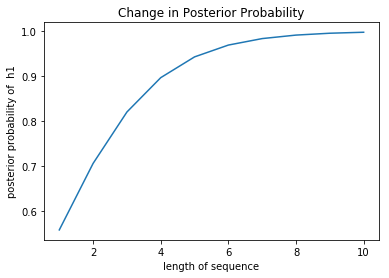

In [12]:
N = 10
thetas = np.array([0.5, 0.95])
priors = np.array([0.6, 0.4])
fig, axis = plt.subplots()
plot_heads(axis, N, thetas, priors)

In [13]:
"""Check the implementation of plot_heads"""
from plotchecker import get_data
from nose.tools import assert_equal, assert_not_equal
from numpy.testing import assert_array_almost_equal

# create fake N, hypotheses, and priors
N = 8
hyps = np.array([[0.5, 0.95], [0.3, 0.2]])
pri = np.array([[0.6, 0.4], [0.1, 0.9]])
ans = np.array([[0.55882353, 0.70645793, 0.8205527, 0.89678023, 0.94288106, 0.9691014, 0.98349602, 0.99124525],
                [0.85714286, 0.8, 0.72727273, 0.64, 0.54237288, 0.44137931, 0.34501348, 0.25989848]])

for idj, j in enumerate(hyps):
    # plot data
    fig, axis = plt.subplots()
    plot_heads(axis, N, j, pri[idj])
    
    # check plot data
    plot_data = get_data(axis)
    assert_array_almost_equal(plot_data, np.vstack([np.arange(1, N+1), ans[idj]]).T)

    # check axis labels and title
    assert_not_equal(axis.get_xlabel(), '', "No x axis label given")
    assert_not_equal(axis.get_ylabel(), '', "No y axis label given")
    assert_not_equal(axis.get_title(), '', "No title given")

    # close the plot
    plt.close(fig)

print("Success!")

Success!


---
## Part C (1 point)

<div class="alert alert-success">Using the plot in Part B, describe what happens to the posterior probability of $h_1$ as the length of the sequence increases. Why should this be the case?</div>

The posterior probability of h1 increases and then flattens out as the length of the sequence increases. This should be the case because if we keep observing heads from the sequence $d_n$, where there are $n$ 1's for all $n \in \{1,2,\cdots,N\}$, it would make sense that the posterior probability of h1 would increase at this rate after observing all the previous priors (which were all heads). The more heads we have seen, the higher the posterior probability of the next sequence and so on.

---

Before turning this problem in remember to do the following steps:

1. **Restart the kernel** (Kernel$\rightarrow$Restart)
2. **Run all cells** (Cell$\rightarrow$Run All)
3. **Save** (File$\rightarrow$Save and Checkpoint)

<div class="alert alert-danger">After you have completed these three steps, ensure that the following cell has printed "No errors". If it has <b>not</b> printed "No errors", then your code has a bug in it and has thrown an error! Make sure you fix this error before turning in your problem set.</div>

In [14]:
print("No errors!")

No errors!
